# Load All Necessary Libraries

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Plotting Libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load Data

In [2]:
# Load Store Dataset

raw_store_df = pd.read_csv('data/store.csv')
print(f"raw_store_df shape: {raw_store_df.shape}")
raw_store_df

raw_store_df shape: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [3]:
# Load Train and Test Dataset

raw_train_df = pd.read_csv('data/train.csv')
raw_test_df = pd.read_csv('data/test.csv')
print(f"raw_train_df shape: {raw_train_df.shape}")
print(f"raw_test_df shape: {raw_test_df.shape}")

raw_train_df shape: (1017209, 9)
raw_test_df shape: (41088, 8)


C:\Users\USER\AppData\Local\Temp\ipykernel_25760\3800764671.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_train_df = pd.read_csv('data/train.csv')


In [4]:
# Merge store df and train df for better prediction

train_merged_df = raw_train_df.merge(raw_store_df, how='left', on='Store')
train_merged_df = train_merged_df.drop(['PromoInterval'], axis=1)
train_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN


In [5]:
# Merge store df and test df

test_merged_df = raw_test_df.merge(raw_store_df, how='left', on='Store')
test_merged_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# Exploratory Data Analysis

In [6]:
# Check weather any null value in the columns

train_merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
dtype: int64

In [7]:
# Check unique value in each column

train_merged_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
dtype: int64

In [8]:
# There should be 4 unique values but has 5. See Next for Solution!
train_merged_df.StateHoliday.value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [9]:
# Replacing string '0' as integer '0' 

train_merged_df['StateHoliday'].replace({'0': 0}, inplace=True)
test_merged_df['StateHoliday'].replace({'0': 0}, inplace=True)
train_merged_df.StateHoliday.value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

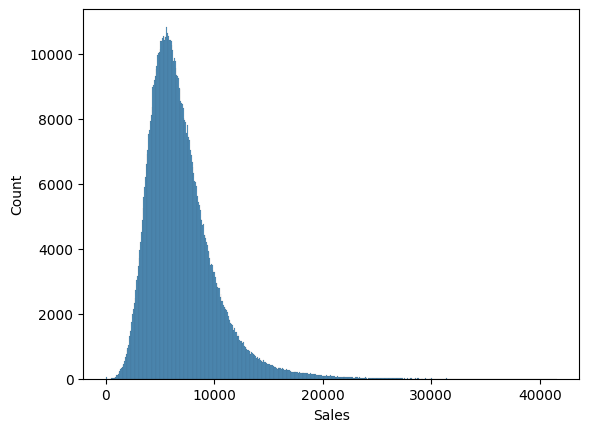

In [10]:
"""
When the store is closed, the sale is zero. So rows with sales 0 doesn't make sense.
But it's more efficient to remove rows with store 0. 
"""

reduced_train_df = train_merged_df[ train_merged_df.Open == 1 ].copy()

# Distribution of target column named 'sales'
sns.histplot(data=reduced_train_df, x='Sales')

<Axes: xlabel='Assortment', ylabel='Count'>

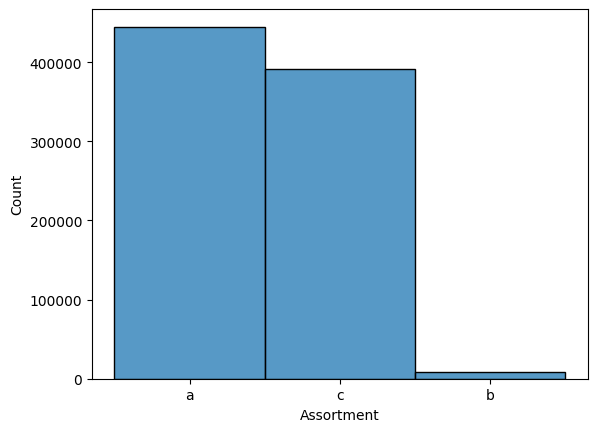

In [11]:
# Distribution of target column named 'sales'
sns.histplot(data=reduced_train_df, x='Assortment')

Text(0.5, 1.0, 'Sales vs Customers')

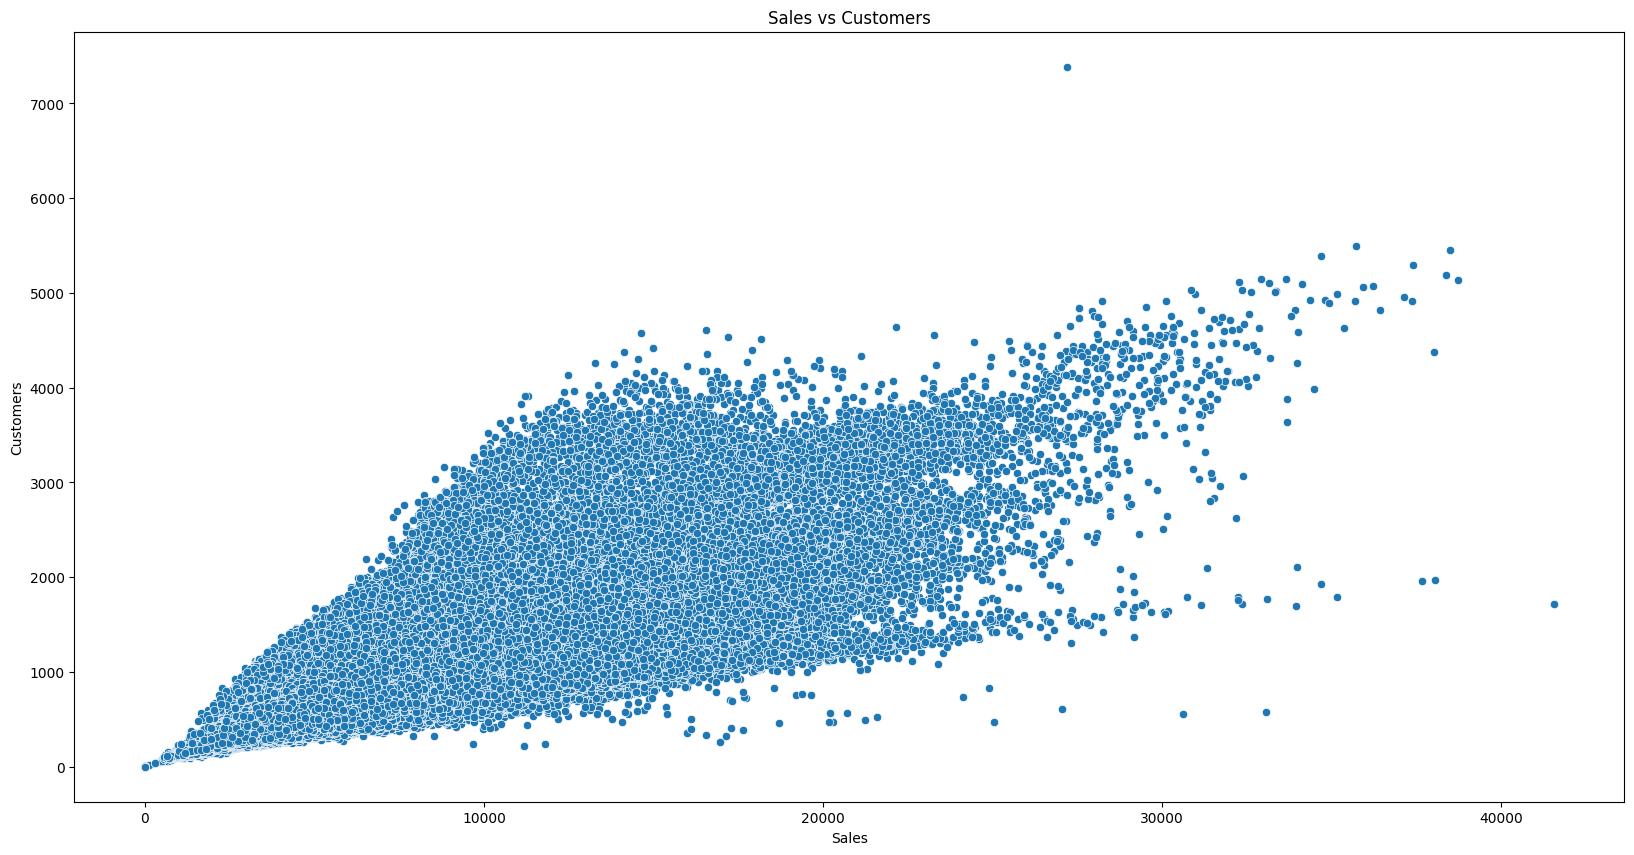

In [12]:
plt.figure(figsize=(20, 10))
# Sales vs Customers Scatter Plot
sns.scatterplot(x=reduced_train_df.Sales, y=reduced_train_df.Customers)
plt.title("Sales vs Customers")

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

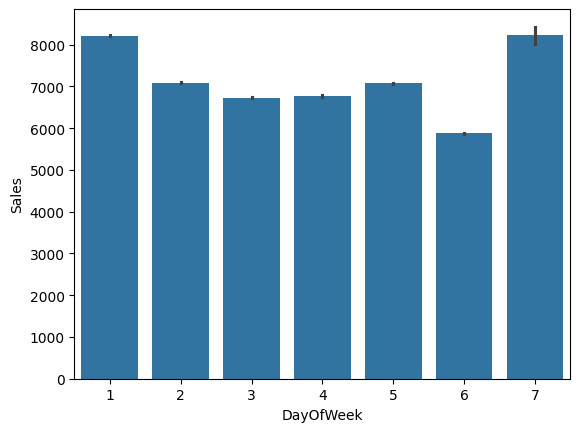

In [13]:
sns.barplot(x=reduced_train_df.DayOfWeek, y=reduced_train_df.Sales)

<Axes: xlabel='StateHoliday', ylabel='Sales'>

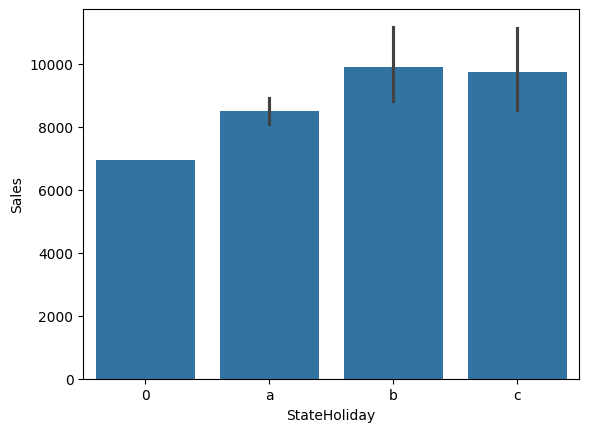

In [14]:
sns.barplot(data=reduced_train_df, x='StateHoliday', y='Sales')

<Axes: xlabel='Assortment', ylabel='Sales'>

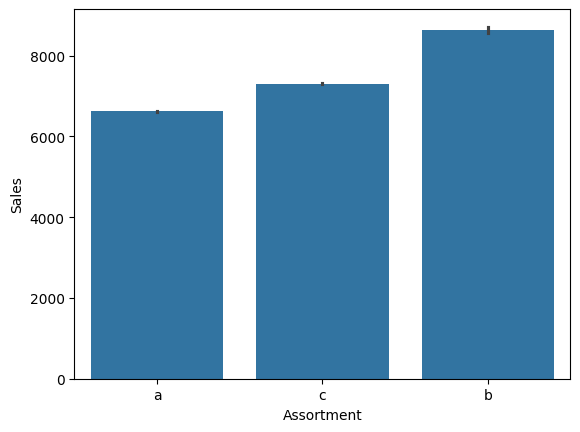

In [15]:
""" 
Assortment - describes an assortment level: a = basic, b = extra, c = extended """
sns.barplot(data=reduced_train_df, x='Assortment', y='Sales')

<Axes: xlabel='StoreType', ylabel='Sales'>

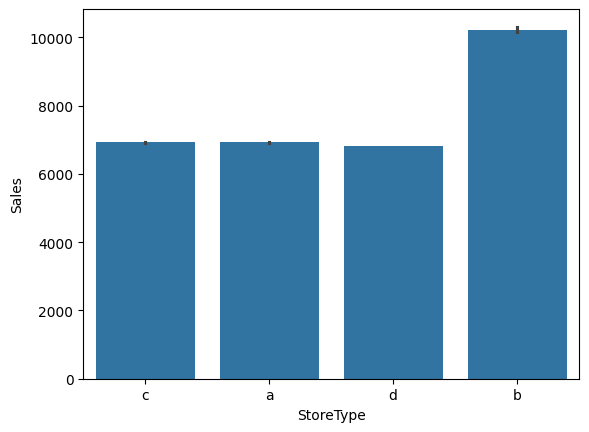

In [16]:
sns.barplot(data=reduced_train_df, x='StoreType', y='Sales')

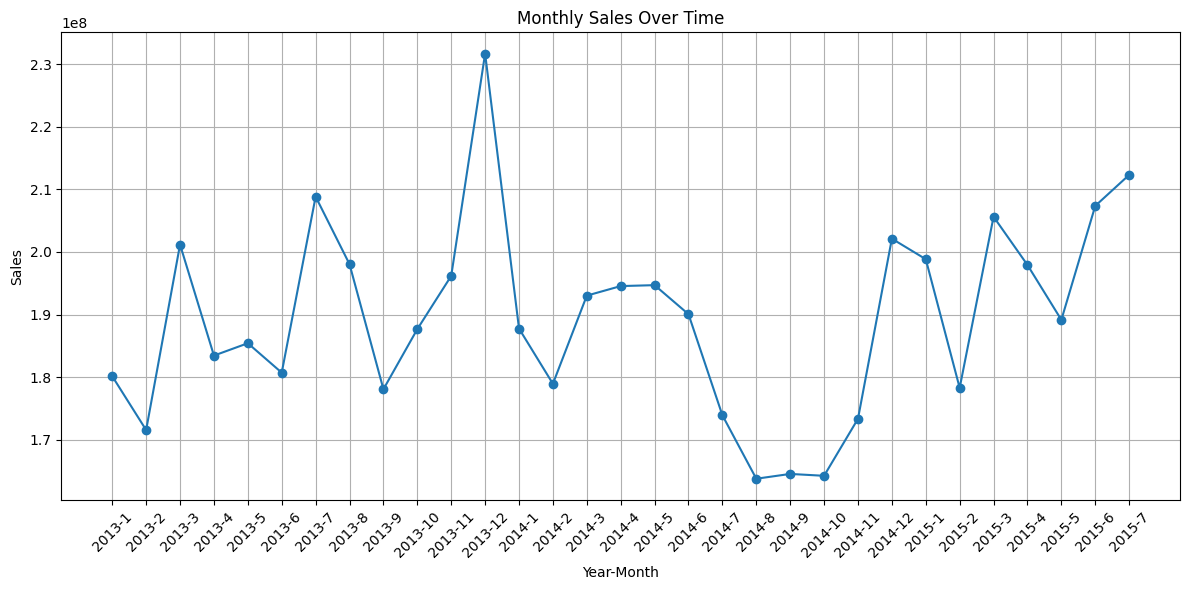

In [17]:
# Visualizing sales for each month over time

# Convert 'Date' column to datetime format
reduced_train_df['Date'] = pd.to_datetime(reduced_train_df['Date'])

# Extracting year and month from the 'Date' column
reduced_train_df['Year'] = reduced_train_df['Date'].dt.year
reduced_train_df['Month'] = reduced_train_df['Date'].dt.month
reduced_train_df['Day'] = reduced_train_df['Date'].dt.day

# Grouping by year and month, and summing up the sales for each group
monthly_sales = reduced_train_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Split the Dataset

In [18]:
""" 
Preparing Test Datasets:

1) Access to test.csv data and merging it with store.csv
2) Transforming Datetime string column to pandas datetime for better access to Date column
3) Create 3 new columns named year, month, day similar to train dataset. 

"""

test_merged_df['Date'] = pd.to_datetime(test_merged_df.Date)

test_merged_df['Year'] = test_merged_df.Date.dt.year
test_merged_df['Month'] = test_merged_df.Date.dt.month
test_merged_df['Day'] = test_merged_df.Date.dt.day

print(f"Estimate Sales from {test_merged_df.Date.dt.date.min()} to {test_merged_df.Date.dt.date.max()}")
test_merged_df

Estimate Sales from 2015-08-01 to 2015-09-17


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1


In [19]:
train_df = reduced_train_df[reduced_train_df.Date.dt.year <= 2014]
val_df = reduced_train_df[reduced_train_df.Date.dt.year == 2015]

print(f"Training Shape: {train_df.shape}")
print(f"Validation Shape: {val_df.shape}")
print(f"Test Shape: {test_merged_df.shape}")

Training Shape: (648360, 20)
Validation Shape: (196032, 20)
Test Shape: (41088, 20)


# Data Preprocessing

In [20]:
# choose columns to train and target

# Set columns for training
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Promo2', 'Day', 'Month', 'Year']
# Set Target Column
target_col = 'Sales'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_merged_df[input_cols].copy()

num_cols = ['Store', 'DayOfWeek', 'Day', 'Month', 'Year']
cat_cols = ['DayOfWeek', 'Promo', 'StoreType', 'Assortment', 'Promo2']

In [21]:
# Encoding

train_inputs = pd.get_dummies(train_inputs)
val_inputs = pd.get_dummies(val_inputs, drop_first=False)
test_inputs = pd.get_dummies(test_inputs)

# Drop the columns that are not in test dataset
train_inputs = train_inputs.drop(['StateHoliday_b', 'StateHoliday_c'], axis=1)
val_inputs = val_inputs.drop(['StateHoliday_b'], axis=1)

In [22]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[num_cols])

# Based on the learning from training datasets, val_df and test_df columns sclaed!
train_inputs[num_cols] = scaler.transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])

# Choose a Model

In [23]:
"""
As the prediction will be evaluated on RMSPE metric, Create a user-defined
rmspe function. 

"""

def rmspe(y_true, y_pred):
    """
    Compute the Root Mean Square Percentage Error (RMSPE) between the true and predicted values.
    
    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    
    Returns:
    - float, RMSPE value
    """
    # Ensure both arrays have the same length
    assert len(y_true) == len(y_pred)
    
    # Compute the percentage error for each observation
    percentage_error = (y_true - y_pred) / y_true
    
    # Exclude observations where true value is zero
    percentage_error[y_true == 0] = 0
    
    # Square the percentage errors
    squared_percentage_error = percentage_error ** 2
    
    # Compute the mean of the squared percentage errors
    mean_squared_percentage_error = np.mean(squared_percentage_error)
    
    # Compute the square root of the mean squared percentage error
    rmspe = np.sqrt(mean_squared_percentage_error)
    
    return rmspe # Convert to percentage

In [24]:
# A helper function to automate task of fitting model and evaluating

def try_model(model):
    model.fit(train_inputs, train_targets)

    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    # Get RMSE
    train_rmse = np.round(mean_squared_error(train_targets, train_preds, squared=False), 5)
    val_rmse = np.round(mean_squared_error(val_targets, val_preds, squared=False), 5)

    # Get RMSPE
    train_rmspe = np.round(rmspe(train_targets, train_preds), 5)
    val_rmspe = np.round(rmspe(val_targets, val_preds), 5)


    print(f"Train RMSE: {train_rmse}")
    print(f"Val RMSE: {val_rmse}")
    print()
    print(f"Train RMSPE: {train_rmspe}")
    print(f"Val RMSPE: {val_rmspe}")

    return model

In [25]:
# Creating a dumb model that can predict average sales only
        
def get_mean(input):
    return np.full(len(input), reduced_train_df.Sales.mean())

dum_train_preds = get_mean(train_df)
dum_val_preds = get_mean(val_df)

from sklearn.metrics import mean_squared_error

# Get root mean squared error
dum_train_eval = mean_squared_error(dum_train_preds, train_targets, squared=False)
dum_val_eval = mean_squared_error(dum_val_preds, val_targets, squared=False)

train_rmspe = rmspe(dum_train_preds, train_targets)
val_rmspe = rmspe(dum_val_preds, val_targets)

print(f"train_rmse: {dum_train_eval}")
print(f"val_rmse: {dum_val_eval}")
print()
print(f"train_rmspe: {train_rmspe}")
print(f"val_rmspe: {val_rmspe}")
      

train_rmse: 3124.212911034433
val_rmse: 3037.1262166880488

train_rmspe: 0.44917065517162236
val_rmspe: 0.4366501296280081


### Linear Regression as a Baseline Model

In [26]:
logit_model = LinearRegression()
try_model(logit_model)

Train RMSE: 2787.20968
Val RMSE: 2694.44891

Train RMSPE: 0.53787
Val RMSPE: 0.47776


LinearRegression()

### Decision Tree Regressor

In [27]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
try_model(decision_tree_model)

Train RMSE: 0.0
Val RMSE: 1380.17354

Train RMSPE: 0.0
Val RMSPE: 0.21355


DecisionTreeRegressor(random_state=42)

### Random Forest

In [28]:
random_forest_model = RandomForestRegressor(random_state=42, 
                                            n_jobs=-1)
try_model(random_forest_model)

Train RMSE: 400.79893
Val RMSE: 1134.79363

Train RMSPE: 0.09413
Val RMSPE: 0.1785


RandomForestRegressor(n_jobs=-1, random_state=42)

# Submission

In [29]:
test_preds = random_forest_model.predict(test_inputs)
submission_df = pd.read_csv('data/sample_submission.csv')
submission_df['Sales'] = test_preds
submission_df.to_csv('data/submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/sample_submission.csv'

# Feature that Matters

In [ ]:
feature_importance_df = pd.DataFrame({ 
    'feature': train_inputs.columns, 
    'importance': random_forest_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance_df

,feature,importance
0,Store,0.565438
2,Promo,0.134409
1,DayOfWeek,0.067784
4,Day,0.059565
5,Month,0.056752
10,StoreType_b,0.023134
3,Promo2,0.015872
9,StoreType_a,0.014520
15,Assortment_c,0.013404
6,Year,0.011328


<Axes: xlabel='importance', ylabel='feature'>

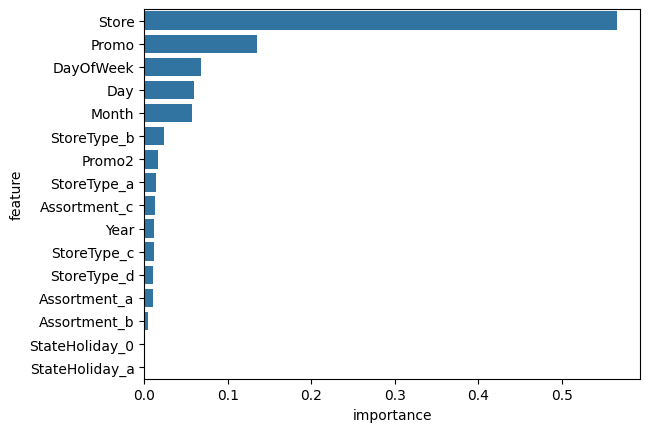

In [ ]:
# Plot to visualize most important feature
sns.barplot(data=feature_importance_df, x='importance', y='feature')

The analysis of feature importance reveals that 'Store' has the highest significance (importance score: 0.565), indicating its substantial impact on sales. Following closely is the 'Promo' feature (importance score: 0.134), suggesting that promotional activities significantly contribute to sales performance. Additionally, 'DayOfWeek' (importance score: 0.068) and 'Day' (importance score: 0.060) are also identified as influential factors, albeit to a lesser extent, in determining sales outcomes. These insights highlight the pivotal role of store-related factors and promotional strategies in driving sales revenue.

Thanks for your time! 